## Load data and Preprocessing data

In [1]:
from google.colab import drive
drive.mount("/drive")
import pandas as pd
from numpy import nan

Mounted at /drive


In [4]:
data = pd.read_csv("/drive/My Drive/Colab Notebooks/data/IST 736 projects/myslice/myslice-text clustering.csv")
corpus = data['myslice.dissatisfation.text'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

['The tiles keep moving around and nothing is named in an intuitive way', 'Stale login request!', "it seems like a hodgepodge and the items I used often aren't represented on the tiles.", 'login', 'Poor navigation features for disabled users', 'Locating tabs or links within its structure', 'Frequently will not load without clearing all of my cache/cookies', 'Menus can be hidden making it difficult to navigate', "Two-factor authentication, being able to log in and do what's needed without the system booting me out. Note that this is only for desktop use, mobile use is much easier.", "it's just not a logical or clear system to navigate, where things are located/filed is weird, and all the orange icons made everything look the same, it's a visual nightmare to navigate as a user.", 'Inability to customize effectively and/or reach other relevant employee resources. ', 'specifically working in PeopleSoft through MySlice', 'Does not have the feel that other modern websites have in 2022', "HR 

In [5]:
#print size in corpus
print('size of dissatisfation texts is', len(corpus))

size of dissatisfation texts is 69


# set up my stop word

In [6]:
my_stopwords=frozenset(['might', 'take', 'ourselves', 'by', 'everything', 'therein', 'twenty', 'others', 'keep', 'ever', 'my', 'been', 'top',  'via', 'are', 'onto', 'would', 'most', 'rather', 'except', 'should', 'per', 'wherein', 'third', 'yourselves', 'nine', 'is', 'namely', 'besides',  'down', 'anyone', 'within', 'latter', 'whose', 'bill', 'throughout', 'until', 'former', 'anything', 'i', 'call', 'thru', 'put', 'see', 'meanwhile', 'very', 'whoever', 'somehow', 'she', 'hereby', 'beside', 'full', 'then', 'something', 'whether', 'can', 'me', 'wherever', 'yours', 'towards', 'together', 'upon', 'name', 'again', 'therefore', 'alone', 'between', 'whom', 'the', 'interest', 'done', 'hereupon', 'them', 'than', 'con', 'eg', 'these', 'becoming', 'much', 'beforehand', 'under', 'too', 'another', 'whither', 'ie', 'un', 'and', 'above', 'amongst', 'across', 'moreover', 'own', 'both', 'other', 'hers', 'find', 'was', 'an', 'many', 'de', 'indeed', 'three', 'twelve', 'serious', 'otherwise', 'thick', 'latterly', 'they', 'thin', 'whatever', 'how', 'same', 'anyway', 'once', 'herself', 'will', 'well', 'give', 'being', 'thereafter', 'seemed', 'sometimes', 'up', 'empty', 'fifteen', 'thereupon', 'where', 'co', 'from', 'whereas', 'over', 'am', 'itself', 'somewhere', 'along', 'which', 'forty', 'also', 'as', 'for', 'amoungst', 'after', 'of', 'back', 'thereby', 'it', 'detail', 'front', 're', 'us', 'five', 'such', 'whole', 'almost', 'made', 'their', 'mine', 'at', 'may', 'sixty', 'before', 'must', 'everywhere', 'amount', 'first', 'already', 'etc', 'eight', 'through', 'perhaps', 'several', 'that', 'mill', 'more', 'whence', 'due', 'each', 'themselves', 'become', 'seems', 'cry', 'into', 'still', 'your', 'why', 'sometime', 'some', 'whenever', 'please', 'neither', 'because', 'herein', 'has', 'this', 'among', 'during', 'when', 'one', 'there', 'ltd', 'hence', 'becomes', 'whereby', 'inc', 'everyone', 'last', 'against', 'out', 'he', 'move', 'all', 'now', 'either', 'bottom', 'nevertheless', 'fifty', 'side', 'hundred', 'his', 'so', 'else', 'or', 'were', 'you', 'further', 'yet', 'here', 'had', 'beyond', 'if', 'part', 'below', 'who', 'be', 'around', 'someone', 'whereupon', 'behind', 'seem', 'ten', 'enough', 'four', 'about', 'in', 'off', 'though', 'since', 'elsewhere', 'anywhere', 'myself', 'sincere', 'hereafter', 'system', 'on', 'ours', 'could', 'with', 'seeming', 'get', 'thence', 'two', 'always', 'toward', 'a', 'yourself', 'do', 'himself', 'her', 'next', 'have', 'mostly', 'formerly', 'we', 'eleven', 'found', 'whereafter', 'anyhow', 'became', 'thus', 'what', 'fire', 'describe', 'him', 'those', 'to', 'afterwards', 'even', 'every', 'fill',  'often', 'its', 'our', 'show', 'go', 'six'])
print(len(my_stopwords))

295


In [7]:
added_stopwords = frozenset(['Myslice', 'myslice'])
my_stopwords =my_stopwords.union(added_stopwords)

In [8]:
print(len(my_stopwords))
print(my_stopwords)

297
frozenset({'thin', 'own', 'much', 'on', 'beforehand', 'yourself', 'four', 'even', 'yet', 'everything', 'con', 'three', 'already', 'cry', 'hundred', 'moreover', 'its', 'hers', 'across', 'whoever', 'at', 'therein', 'around', 'what', 'can', 'otherwise', 'seeming', 'thereafter', 'been', 'every', 'whereas', 'were', 'except', 'found', 'either', 'so', 'full', 'eg', 'whither', 'most', 'onto', 'then', 'see', 'as', 'former', 'again', 'throughout', 'latter', 'for', 'two', 'to', 'have', 'over', 'one', 'an', 'whether', 'be', 'interest', 'fifteen', 'under', 'she', 'before', 'whatever', 'our', 'beside', 'many', 'yours', 'i', 'sincere', 'had', 'seemed', 'nine', 'because', 'was', 'ours', 'describe', 'some', 'him', 'us', 'once', 'where', 'formerly', 'could', 'show', 'please', 'indeed', 'back', 'upon', 'am', 'who', 'thereby', 'up', 'etc', 'you', 'somewhere', 'give', 'now', 'detail', 'toward', 'ltd', 'anyone', 'same', 'sometimes', 'itself', 'fire', 'sometime', 'and', 'became', 'a', 'top', 'un', 'never

# KMeans


tfidf representation

In [9]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,encoding='latin-1', binary=False, analyzer= 'word', token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'", stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

73


In [10]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [11]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

In [14]:
from sklearn.cluster import KMeans
K = 7
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

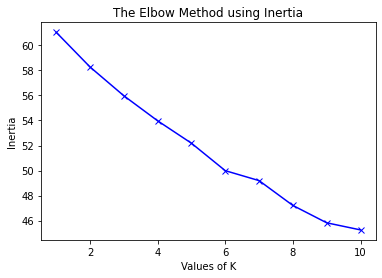

In [28]:
elbow(10, tfidf)

In [16]:
from sklearn.cluster import KMeans
K = 7
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [17]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [18]:
print_cluster_sizes(tfidf_model)

{5: 10, 1: 5, 0: 30, 4: 3, 2: 11, 6: 7, 3: 3}


In [20]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [21]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
accessibility
Findability
declining speed
Locating tabs or links within its structure
Too many steps


======cluster # 1
difficult to find what you need - you have to drill down, and parking serivces is a mess!
accessibility
Findability
Locating tabs or links within its structure
Too many steps


======cluster # 2
accessibility
Locating tabs or links within its structure
Findability
Too many steps
declining speed


======cluster # 3
user interface design
Platform user interface, navigation
new interface missing functions
accessibility
declining speed


======cluster # 4
Navigation
organization and navigation of site
Poor navigation features for disabled users
declining speed
Findability


======cluster # 5
accessibility
declining speed
Locating tabs or links within its structure
Findability
Too many steps


======cluster # 6
Clunky and dated design
accessibility
declining speed
Locating tabs or links within its structure
Findability


unigram representation

In [22]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False,analyzer= 'word', token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'", min_df=2, stop_words=my_stopwords)
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

73


In [23]:
from sklearn.cluster import KMeans

K = 6
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

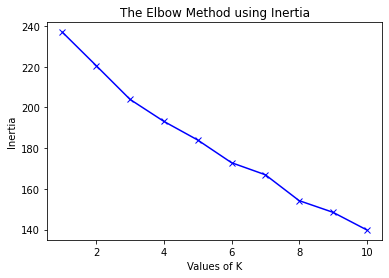

In [25]:
elbow(10, uni)

In [26]:
from sklearn.cluster import KMeans

K = 6
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

In [30]:
print_cluster_sizes(uni_model)

{1: 54, 5: 9, 4: 1, 0: 2, 2: 2, 3: 1}


In [27]:
print_docs_closest_to_centroids(uni_model, uni, 3)



======cluster # 0
Degradation of menu system, loss of "breadcrumbs", extra clicks required to navigate
MySlice just feels "clunky"
Too many steps


======cluster # 1
accessibility
declining speed
Locating tabs or links within its structure


======cluster # 2
Some applications in MySlice only work with certain browsers (e.g., the directory doesn't work if you're using Edge).
You shouldn't have to log in to MySlice to get the university directory. If I am looking for a professor's name, I should be able to find a directory on the homepage.
It is often hard to find what I'm looking for


======cluster # 3
I always get multiple error messages when trying to access my classes through MySlice. I also find it very inconvenient that information for faculty (rosters, class schedules, etc) is embedded under "employee" information now. I think it should remain separate.
Degradation of menu system, loss of "breadcrumbs", extra clicks required to navigate
Inability to customize effectively and/o

# LDA


In [32]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tf-idf representation

In [33]:
# tfidf usually help improve topic models
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, binary=False, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

67


In [34]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 7

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [35]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
time does computer access code
Topic 1:
navigate having difficult rosters required
Topic 2:
functions interface clunky myslice just
Topic 3:
intuitive lot clunky old times
Topic 4:
navigation design browsers mobile compatibility
Topic 5:
phone things load cache multiple
Topic 6:
login training specific myslice use


In [36]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities
# lda_z stores the prob distribution for each document

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(69, 7)
[0.0593914  0.05942034 0.05938744 0.64375464 0.0593306  0.05936573
 0.05934985]


Unigram representation

In [37]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

274


In [38]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 6

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [39]:
no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
modern navigation links mobile does
Topic 1:
interface times things user reach
Topic 2:
myslice browsers like clunky just
Topic 3:
myslice use orange clunky functions
Topic 4:
sign phone specific login difficult
Topic 5:
platform intuitive access outdated cache


In [40]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(69, 6)
[0.02791446 0.02788117 0.02789382 0.02795544 0.02786943 0.86048568]


# BERTopic

In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

69


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-12-06 23:18:37,632 - BERTopic - Transformed documents to Embeddings
2022-12-06 23:18:47,317 - BERTopic - Reduced dimensionality
2022-12-06 23:18:47,345 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

2


,Topic,Count,Name
0,-1,9,-1_myslice_the_on_directory
1,0,46,0_it_to_and_is


In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['Outdated look', 'Clunky and dated design', 'Platform user interface, navigation']

== Representative documents in cluster # 1
['Each time needing a code to access', 'Stale login request!', 'many times I have to login several times, very inconvenient..']


In [ ]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

# SBERT


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 6  # use number of cluster from KMeans
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{4: 7, 1: 12, 3: 22, 0: 8, 5: 8, 2: 12}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 5)



======cluster # 0
Navigation
Menus can be hidden making it difficult to navigate
Platform user interface, navigation
Degradation of menu system, loss of "breadcrumbs", extra clicks required to navigate
Poor navigation features for disabled users


======cluster # 1
many times I have to login several times, very inconvenient..
Having to sign in/authenticate usage makes logging in cumbersome
Stale login request!
Constantly having to clear cache and told I am still logged into the platform when i am not.  
login


======cluster # 2
I always get multiple error messages when trying to access my classes through MySlice. I also find it very inconvenient that information for faculty (rosters, class schedules, etc) is embedded under "employee" information now. I think it should remain separate.
It is an organizational nightmare. Here is one example. As a faculty advisor I have to look under employee services to find the schedule of classes to help students finds open course sections. How does